## Assignment 3 - Time Series
**(15 points + 3 bonus points)**

In this assignment, we will analyze the Australian Beer Production dataset. The dataset can be found on this <a href="https://www.kaggle.com/shenba/time-series-datasets#monthly-beer-production-in-austr.csv">Kaggle</a> page - Time Series Datasets.  

In [1]:
import numpy as np  # For computations
import pandas as pd  # For indexing our data

np.random.seed(12345)
import matplotlib.pyplot as plt  # for visualizing our data
plt.style.use('fivethirtyeight')

<div style="font-size:20px"><b>Task 1: </b><em>Read the data and create a time series.</em> </div><div style="font-size:14px">
    HINT: look at the parameters of the <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>read_csv()</code></a> function to make sure that you create a Series and not a Dataframe and that the dates are formatted as a DateTime object and used as an index.</div>

In [2]:
# Tutorial here 
# https://machinelearningmastery.com/load-explore-time-series-data-python/
data = pd.read_csv('monthly-beer-production-in-austr.csv', 
                   # index_col=0 makes the first column the index
                   index_col=0, 
                   # parse_dates=[0] parses the first column for datetime array
                   # parse_date=True will parse the index
                   parse_dates=True,
                   # squeeze=True returns Series instead of DataFrame
                  squeeze=True)

In [3]:
data

Month
1956-01-01     93.2
1956-02-01     96.0
1956-03-01     95.2
1956-04-01     77.1
1956-05-01     70.9
              ...  
1995-04-01    127.0
1995-05-01    151.0
1995-06-01    130.0
1995-07-01    119.0
1995-08-01    153.0
Name: Monthly beer production, Length: 476, dtype: float64

In [4]:
# AND LET THERE BE A TIME SERIES OBJECT!!!
type(data)

pandas.core.series.Series

<div style="font-size:20px"><b>Task 2: </b><em>Plot the time series.</em> </div><div style="font-size:14px">
What do you see in the graph? Does the data have seasonality or trend? Describe the graph. Is it stationary?</div>

<em><u>What do you see in the graph?</u></em> Very seasonal
<br><br><em><u>Does the data have seasonality or trend?</u></em>
<br><br><em><u>Describe the graph.</u></em>a
<br><br><em><u>Is it <a href="https://machinelearningmastery.com/time-series-data-stationary-python/">stationary</a>?</u></em> A stationary time series is when the mean and variance doesn't change over time. Time series are also stationary if they do not have seasonal effects. This is important because stationary time series are easier to model. 

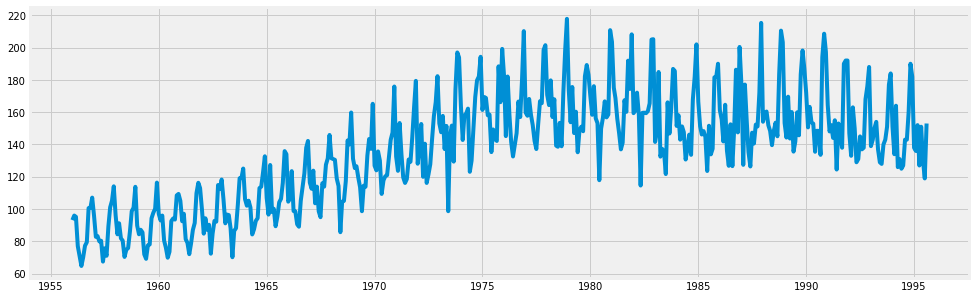

In [5]:
# A warning told me to register matplotlib converters....idk what this is
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15,5))
plt.plot(data)
plt.show()

<div style="font-size:20px"><b>Task 3: </b><em>Plot an autocorrelation function graph of this time series.</em> </div><div style="font-size:14px">
Is the data autocorrelated or not? Library for the autocorrelation function: <code>from pandas.plotting import autocorrelation_plot</code></div>

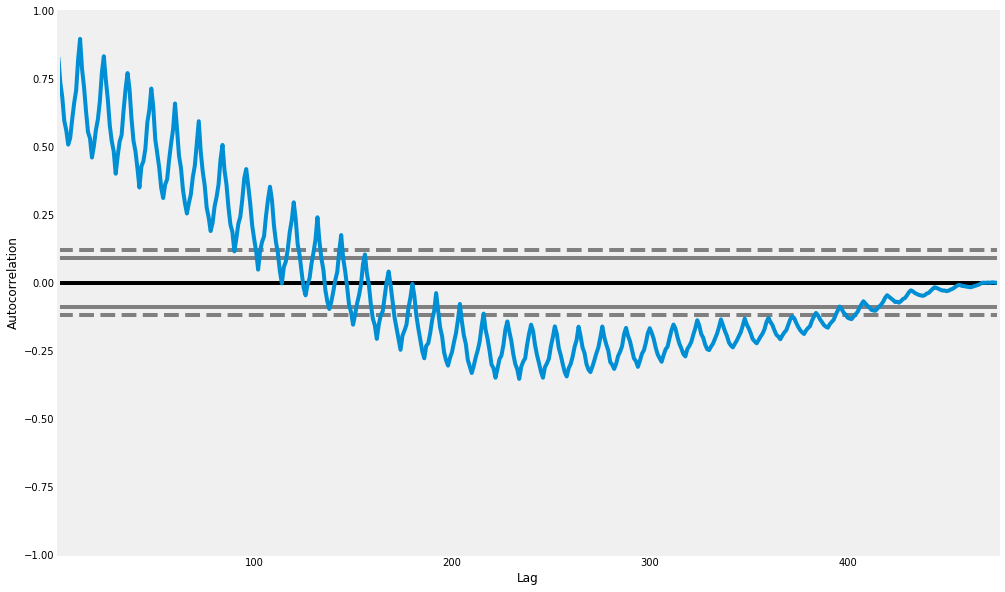

In [6]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(15,10))
autocorrelation_plot(data)

<div style="font-size:20px"><b>Task 4: </b><em>Perform differencing on the time series.</em> </div><div style="font-size:14px">
Calculate the difference of each element of the Series compared with another element in the Series (you can use the default setting of the function which calculates the difference with the element in the previous row). You can use either function <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.diff.html#pandas.Series.diff"><code>diff()</code></a>, or <code>shift()</code>, which we looked at in class.</div>

In [8]:
difference = data.diff()
difference

Month
1956-01-01     NaN
1956-02-01     2.8
1956-03-01    -0.8
1956-04-01   -18.1
1956-05-01    -6.2
              ... 
1995-04-01   -25.0
1995-05-01    24.0
1995-06-01   -21.0
1995-07-01   -11.0
1995-08-01    34.0
Name: Monthly beer production, Length: 476, dtype: float64

<div style="font-size:20px"><b>Task 5: </b><em>Plot a time plot and an autocorrelation function graph of this new time series.</em> </div><div style="font-size:14px">
Is the data autocorrelated or not? Is it stationary? HINT: The autocorrelation function will not display any data if the Series contains any missing values. Make sure that you deal with NaNs before plotting.</div>

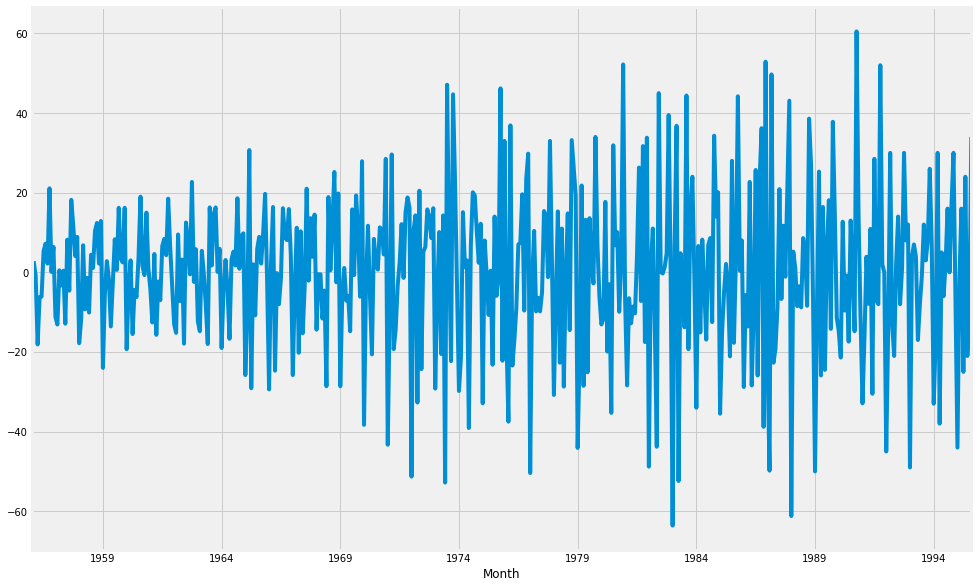

In [10]:
plt.figure(figsize=(15,10))
difference.plot()

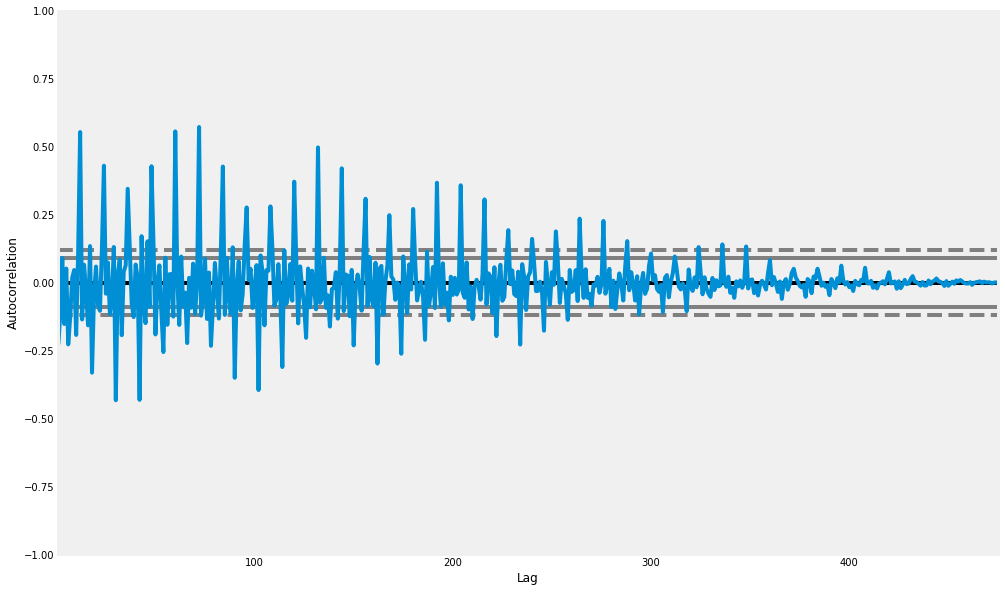

In [16]:
difference.dropna(inplace=True) # Remove the NaNs
plt.figure(figsize=(15,10))
autocorrelation_plot(difference)

<div style="font-size:20px"><b>Task 6: </b><em>Simple validation of stationarity for the differenced time series.</em> </div><div style="font-size:14px">
Split the time series (from Task 4) into 2 subsets and calculate the mean and variance for each subset. Can we draw any conclusion about the stationarity of the time series based on this calculation?</div>

In [18]:
stationarity = pd.read_csv('monthly-beer-production-in-austr.csv', 
                        header=0, 
                        index_col=0) 
stationarity = stationarity.values

In [19]:
split = round(len(stationarity) / 2)
top_half, bottom_half = X[0:split], X[split:]

In [35]:
top_mean, bottom_mean = top_half.mean(), bottom_half.mean()
print('Mean of Top Half \t= %f \nMean of Bottom Half \t= %f' % (top_mean, bottom_mean))

Mean of Top Half 	= 114.626471 
Mean of Bottom Half 	= 158.164286


In [37]:
top_var, bottom_var = top_half.var(), bottom_half.var()
print('Variance of Top Half \t= %f \nVariance of Bottom Half\t= %f' % (top_var, bottom_var))

Variance of Top Half 	= 845.637240 
Variance of Bottom Half	= 478.412380


<div style="font-size:20px"><b>Task 7: </b><em>Using the Augmented Dickey–Fuller test, calculate the ADF Statistic value, p-value, and critical values for both the original time series and the time series you get in Task 4.</em> </div><div style="font-size:14px">
Describe the result. (optional, 3 bonus points)</div>

In [38]:
# The ADF test determines the impact a trend has on a time series
# If null hypothesis, that the time series is not stationary, is rejected...
# Then it has some time dependent structure
from statsmodels.tsa.stattools import adfuller

In [39]:
adf_data = pd.read_csv('monthly-beer-production-in-austr.csv',
                      header=0,
                      index_col=0,
                      squeeze=True)

In [41]:
adf_data = adf_data.values

In [42]:
result = adfuller(adf_data)

In [56]:
print('ADF Statistic\t= %f\np-value\t\t= %f' % (result[0], result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic	= -2.282661
p-value		= 0.177621
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570
